In [1]:
import os
import matplotlib.pyplot as plt


from data import DIV2K

from model.dae import dae
from train import DaeTrainer

%matplotlib inline

In [2]:
# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [3]:
# Location of model weights (needed for demo)
# f'weights = weight라는 이름을 가진 directory
# weights_file = weights directory 밑에 'edsr-16-x4' 밑에 'weights.h5'파일 만들기
# weights_file 은 trainer.model.save_weights할때 사용
weights_dir = f'weights/dae-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

# True로 생성하면 해당 파라미터(weights_dir)가 기존에 존재하면 에러없이 넘어가고, 존재하지 않으면 생성
os.makedirs(weights_dir, exist_ok=True)

# Dataset

In [4]:
# DVI2K는 class

div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [5]:
# dataset은 method
# 이미 다운로드 되어 있으면 tf.io.read_file로 파일 불러옴

train_ds = div2k_train.dataset(batch_size=16, random_transform=True) # repeat_count = None , It is Default
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

In [6]:
print(type(train_ds))
print(type(valid_ds))
# print(len(train_ds))
# print(len(valid_ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


# Training

In [7]:
trainer = DaeTrainer(model=dae(kernel_size=4, filters_orig=32, layer_depth=4), 
                      checkpoint_dir=f'.ckpt/dae-x{scale}')

Model restored from checkpoint at step 2000.


In [8]:
# Train EDSR model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.

# loss값 확인해라
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

3000/300000: loss = 37.711, PSNR = 14.950018 (194.54s)
4000/300000: loss = 37.171, PSNR = 14.937228 (204.99s)
5000/300000: loss = 37.012, PSNR = 14.986731 (208.08s)
6000/300000: loss = 36.645, PSNR = 15.022344 (209.33s)
7000/300000: loss = 36.674, PSNR = 15.101117 (210.29s)
8000/300000: loss = 36.024, PSNR = 15.147115 (209.89s)
9000/300000: loss = 35.859, PSNR = 15.143431 (210.51s)
10000/300000: loss = 35.955, PSNR = 15.153793 (210.82s)
11000/300000: loss = 35.431, PSNR = 15.144956 (210.71s)
12000/300000: loss = 35.612, PSNR = 15.140486 (210.25s)
13000/300000: loss = 35.446, PSNR = 15.133408 (212.58s)
14000/300000: loss = 35.553, PSNR = 15.118457 (210.85s)
15000/300000: loss = 35.266, PSNR = 15.130649 (211.17s)
16000/300000: loss = 35.706, PSNR = 15.122335 (210.81s)
17000/300000: loss = 35.196, PSNR = 15.117673 (210.51s)
18000/300000: loss = 34.987, PSNR = 15.095488 (210.84s)
19000/300000: loss = 35.228, PSNR = 15.117581 (210.54s)
20000/300000: loss = 35.068, PSNR = 15.069229 (210.23s)

149000/300000: loss = 34.453, PSNR = 15.058578 (212.24s)
150000/300000: loss = 34.600, PSNR = 15.082382 (210.32s)
151000/300000: loss = 34.551, PSNR = 15.068655 (210.77s)
152000/300000: loss = 34.466, PSNR = 15.082499 (210.92s)
153000/300000: loss = 34.421, PSNR = 15.087519 (210.31s)
154000/300000: loss = 34.461, PSNR = 15.064363 (210.82s)
155000/300000: loss = 34.538, PSNR = 15.073346 (210.67s)
156000/300000: loss = 34.425, PSNR = 15.075887 (211.12s)
157000/300000: loss = 34.546, PSNR = 15.085562 (210.72s)
158000/300000: loss = 34.083, PSNR = 15.087059 (211.03s)
159000/300000: loss = 34.683, PSNR = 15.086166 (210.83s)
160000/300000: loss = 34.359, PSNR = 15.079168 (210.68s)
161000/300000: loss = 34.602, PSNR = 15.078998 (210.33s)
162000/300000: loss = 34.144, PSNR = 15.079068 (210.53s)
163000/300000: loss = 34.568, PSNR = 15.081700 (210.81s)
164000/300000: loss = 34.454, PSNR = 15.096103 (210.35s)
165000/300000: loss = 34.414, PSNR = 15.065630 (210.38s)
166000/300000: loss = 34.548, P

293000/300000: loss = 34.404, PSNR = 15.075851 (211.60s)
294000/300000: loss = 34.535, PSNR = 15.086210 (212.48s)
295000/300000: loss = 34.493, PSNR = 15.067375 (212.30s)
296000/300000: loss = 34.486, PSNR = 15.077991 (211.81s)
297000/300000: loss = 34.311, PSNR = 15.064969 (212.01s)
298000/300000: loss = 34.358, PSNR = 15.076144 (212.19s)
299000/300000: loss = 34.115, PSNR = 15.080246 (211.91s)
300000/300000: loss = 34.085, PSNR = 15.061597 (211.50s)


In [9]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 10000.


In [10]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 14.529789


In [11]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

# Demo

In [12]:
model = dae(kernel_size = 4, filters_orig=32, layer_depth=4)
model.load_weights(weights_file)

In [13]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

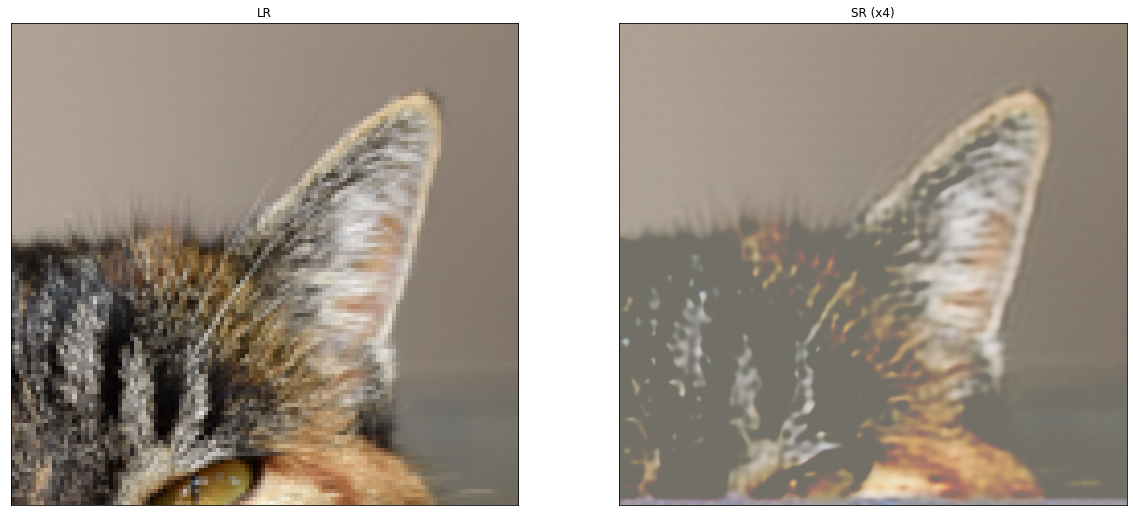

In [14]:
resolve_and_plot('demo/0869x4-crop.png')

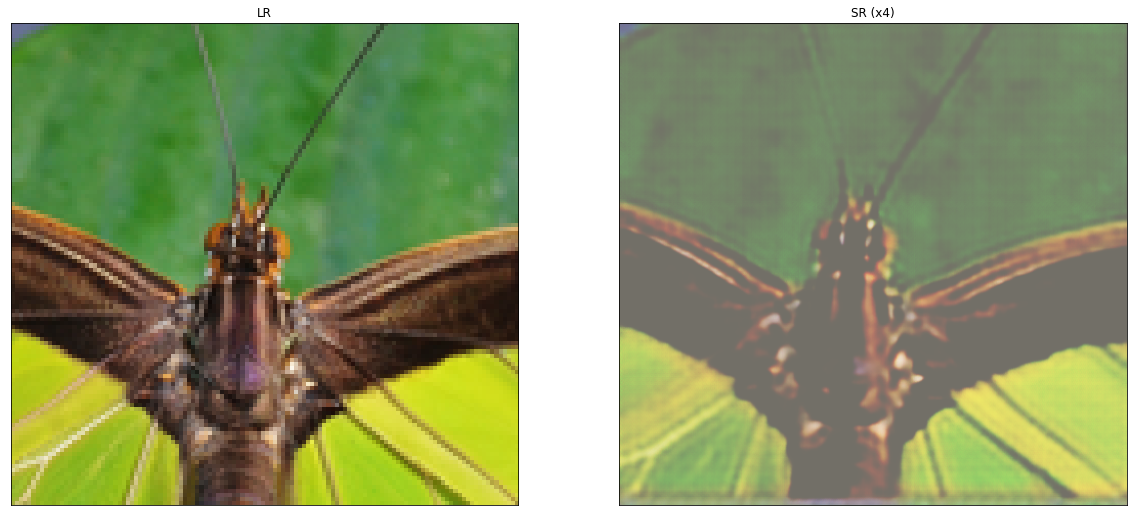

In [15]:
resolve_and_plot('demo/0829x4-crop.png')

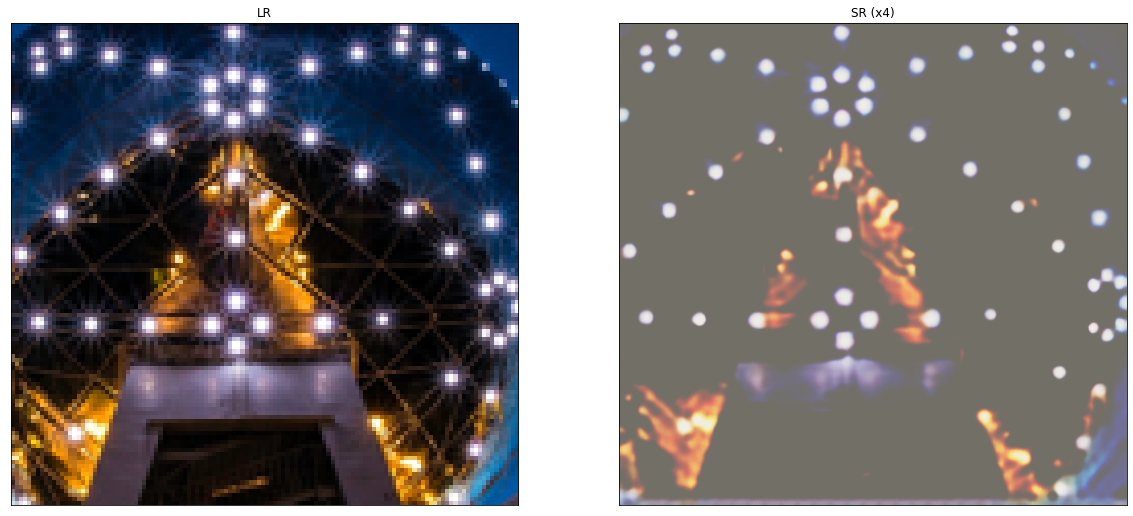

In [16]:
resolve_and_plot('demo/0851x4-crop.png')